## Key assumption
We assume that the EFAP food assistance site landscape remained largely stable between 2023 and 2024, and therefore use the November 4, 2024 EFAP dataset as a proxy for food assistance site availability across both years of analysis.

## key limitation
Because EFAP data are only available as point-in-time snapshots, this approach does not capture potential changes in site availability between 2023 and 2024, such as temporary closures, relocations, or newly established programs. As a result, supply measures may not reflect short-term fluctuations in food assistance access over time.

In [ ]:
import pandas as pd 
import requests
import os
import re

In [ ]:
df = pd.read_csv('EFAP_pdf_11_4_24.csv')

In [3]:
df.head()

,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS
0,80604,SK,HOLY APOSTLES SOUP KITCHEN,212 924-0167,296 NINTH AVENUE,NY,10001,MON-FRI 10:30AM-12:30PM
1,85547,FP,HOLY APOSTLES SOUP KITCHEN PANTRY,646-998-6105,296 NINTH AVENUE,NY,10001,"TUE,WED,THUR 1:30-3PM"
2,80757,FP,ST. JOHN'S BREAD OF LIFE,212 564-9070,213 WEST 30TH STREET,NY,10001,"WED (2,4) 11AM-1PM"
3,85701,FP,ARTISTS ATHLETES ACTIVISTS INCORPORATED,347-229-8399,110 COLUMBIA STREET,NY,10002,THUR 12:30-3PM
4,80546,FP,DEWITT REFORMED CHURCH,212 674-3341,280 RIVINGTON STREET,NY,10002,"SAT(1,3) 10AM-12PM"


### Clean the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        561 non-null    int64 
 1   TYPE      561 non-null    object
 2   PROGRAM   561 non-null    object
 3   PHONE     561 non-null    object
 4   DISTADD   561 non-null    object
 5   DISTBORO  560 non-null    object
 6   DISTZIP   561 non-null    int64 
 7   DAYS      561 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


In [5]:
df.isnull().sum()

ID          0
TYPE        0
PROGRAM     0
PHONE       0
DISTADD     0
DISTBORO    1
DISTZIP     0
DAYS        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# check if rows are duplicted too
df[df.duplicated()]

,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS


In [8]:
df.keys()

Index(['ID', 'TYPE', 'PROGRAM', 'PHONE', 'DISTADD', 'DISTBORO', 'DISTZIP',
       'DAYS'],
      dtype='object')

In [9]:
df['TYPE'].value_counts()

TYPE
FP     413
SK      75
FPK     28
FPH     26
FPM     10
SKM      3
SKK      3
FPV      3
Name: count, dtype: int64

In [10]:
df['PROGRAM'].value_counts()

PROGRAM
AAIDS CENTER OF QUEENS COUNTY                3
FIRST PRESBYTERIAN CHURCH OF JAMAICA         2
IRIS HOUSE                                   2
CHURCH OF GOD PROPHECY                       2
ADVENT LUTHERAN CHURCH                       2
                                            ..
MOUNT PISGAH BAPTIST CHURCH                  1
JESUS RECONCILIATION MINISTRIES, INC         1
JAMAICA BENEVOLENT ARM & CULTURAL CENTER     1
BRONX BETHANY COMMUNITY CORPORATION          1
BETHEL AME CHURCH/BETHEL ARVERNE COMM.       1
Name: count, Length: 514, dtype: int64

In [11]:
# see a list of all the value counts for the PROGRAM column
df['PROGRAM'].value_counts().index.tolist()

['AAIDS CENTER OF QUEENS COUNTY ',
 'FIRST PRESBYTERIAN CHURCH OF JAMAICA ',
 'IRIS HOUSE ',
 'CHURCH OF GOD PROPHECY ',
 'ADVENT LUTHERAN CHURCH ',
 'BROADWAY COMMUNITY ',
 'THE SALVATION ARMY JAMAICA CITADEL CORPS ',
 'ST. STEPHEN OUTREACH COMMUNITY DEVELOPMENT CORPORATION ',
 'FOOD BANK FOR NEW YORK CITY ',
 'ACTS COMMUNITY DEVELOPMENT CORPORATION ',
 "ST. ANN'S CHURCH OF MORRISANIA ",
 'CORONA SEVENTH DAY ADVENTIST CHURCH ',
 'HEBRON SEVENTH DAY ADVENTIST CHURCH ',
 ' MASBIA OF FLATBUSH ',
 'NEW YORK COMMON PANTRY ',
 'THE SALVATION ARMY QUEENS TEMPLE CORP ',
 'BETHEL GOSPEL TABERNACLE CHURCH ',
 'THE SALVATION ARMY BRONX CITADEL ',
 'NEXT STEP COMMUNITY CHURCH ',
 ' MASBIA OF QUEENS ',
 'HEALTH ESSENTIAL ASSOCIATION INC ',
 'THE SALVATION ARMY STAPLETON CORPS ',
 'THE SALVATION ARMY SUNSET PARK CORPS ',
 'STAPLETON U.A.M.E. CHURCH ',
 'BETH HARK CHRISTIAN COUNSELING CENTER ',
 'PROJECT HOSPITALITY, INC. ',
 'FAITH CENTER FOR HUMAN SERVICES, INC ',
 'THE SALVATION ARMY BUSHWICK COR

In [12]:
df['DISTADD'].value_counts().index.tolist()

['108 EAST 51ST STREET',
 '296 NINTH AVENUE',
 '874 MYRTLE AVENUE',
 '2290 FIRST AVENUE',
 '5518 CHURCH AVENUE',
 '777 SCHENECTADY AVENUE',
 '520 50TH STREET',
 '360 SCHERMERHORN STREET',
 '200 FOURTH AVENUE',
 '2348 ADAM CLAYTON POWELL JR. BLVD',
 '110-25 GUY R. BREWER BLVD.',
 '800 MARCY AVENUE',
 '8 EAST 109TH STREET',
 '89-60 164TH STREET',
 '257 MACON STREET',
 '71 MALTA STREET',
 '138 PENNSYLVANIA AVE',
 '1256 DEAN STREET',
 '1014-18 GATES AVENUE',
 '795 LEXINGTON AVE',
 '1151 BUSHWICK AVENUE',
 '1745 1ST AVENUE',
 '1909 VYSE AVENUE',
 '1101 BOSTON ROAD',
 '3780 THIRD AVENUE',
 '603 PROSPECT AVENUE',
 '35-30 103RD STREET',
 "295 ST. ANN'S AVENUE",
 '100-10 ASTORIA BLVD (EAST ELMHURST)',
 '86-07 35TH AVENUE',
 '1372 CONEY ISLAND AVE',
 '105-47 64TH ROAD',
 '425 EAST 159TH STREET',
 '114 EAST 188TH STREET',
 '3154 FISH AVENUE',
 '15 BROAD STREET',
 '2114 MERMAID AVE',
 '90-23 161ST STREET',
 '2759 WEBSTER AVENUE',
 '120 EAST 32ND STREET',
 '1047 AMSTERDAM AVENUE',
 '241 WEST 72ND S

## VALIDATE ZIPCODES

In [13]:
# chek zipcodes
df['DISTZIP'].value_counts().index.tolist()

[11203,
 11207,
 11216,
 10456,
 11212,
 11432,
 10304,
 11208,
 11221,
 11233,
 10025,
 11226,
 10459,
 11691,
 11412,
 11433,
 10035,
 10452,
 10457,
 11236,
 10455,
 10469,
 11217,
 10011,
 11206,
 10009,
 10473,
 11230,
 10460,
 10002,
 11434,
 10468,
 11210,
 11413,
 10027,
 10029,
 10030,
 11372,
 10462,
 11213,
 11220,
 11101,
 11225,
 10034,
 11234,
 10466,
 11385,
 11429,
 10454,
 11375,
 11368,
 11238,
 10026,
 10451,
 10453,
 11423,
 11377,
 11223,
 11224,
 11418,
 10467,
 11369,
 11436,
 11218,
 11420,
 11214,
 11435,
 11231,
 11373,
 11235,
 10001,
 10037,
 11204,
 10018,
 10022,
 10128,
 10024,
 10031,
 10472,
 10033,
 10458,
 11211,
 11209,
 10302,
 10301,
 10039,
 11411,
 10032,
 11417,
 11239,
 11422,
 10023,
 10019,
 10016,
 10013,
 11355,
 11367,
 11219,
 10474,
 11237,
 11215,
 10309,
 11201,
 10475,
 11229,
 10461,
 11428,
 11419,
 11222,
 11354,
 11102,
 11103,
 11106,
 11453,
 11205,
 10463,
 11415,
 11416,
 10303,
 11414,
 10036,
 11232,
 10314,
 11379,
 10044,


In [14]:
df['DISTZIP'] = df['DISTZIP'].astype(str).str.strip()


In [15]:
df[df['DISTZIP'].str.len() != 5]

,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS


In [16]:
df['DISTZIP'] = df['DISTZIP'].str.split('-').str[0]

In [17]:
df[~df['DISTZIP'].str.isdigit()]


,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS


In [18]:
df[~df['DISTZIP'].astype(int).between(10001, 11697)]


,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS


In [19]:
df[['DISTZIP', 'DISTBORO']].head()

,DISTZIP,DISTBORO
0,10001,NY
1,10001,NY
2,10001,NY
3,10002,NY
4,10002,NY


## VALIDATE BOROS

In [20]:
df['DISTBORO'].value_counts()

DISTBORO
BK    195
QN    132
BX    108
NY    103
SI     22
Name: count, dtype: int64

In [21]:
boro_map = {
    'BK': 'Brooklyn',
    'QN': 'Queens',
    'BX': 'Bronx',
    'SI': 'Staten Island',
    'NY': 'Manhattan'
}

df['borough'] = df['DISTBORO'].map(boro_map)

In [22]:
df['borough'].value_counts()

borough
Brooklyn         195
Queens           132
Bronx            108
Manhattan        103
Staten Island     22
Name: count, dtype: int64

In [23]:
df.keys()

Index(['ID', 'TYPE', 'PROGRAM', 'PHONE', 'DISTADD', 'DISTBORO', 'DISTZIP',
       'DAYS', 'borough'],
      dtype='object')

### VALIDATE ID

In [24]:
df['ID'].duplicated().sum()

0

In [25]:
df['ID'].is_unique


True

### VALIDATE TYPE

In [26]:
df['TYPE'].value_counts()

TYPE
FP     413
SK      75
FPK     28
FPH     26
FPM     10
SKM      3
SKK      3
FPV      3
Name: count, dtype: int64

#### Explanition of each type
- **FP: Food pantry**
    - People take food home such as groceries (canned goods, rice, pasta or produce)
    - Access is weekly or monthly, is tied to hours, ID rules or residency. 
    - Think: “I need food to cook for my family this week.”
- **SP: Soup pantry**
    - People eat prepared meals on site which include hot meals, served same day
    - Usually: daily or multiple times per week, fewer barriers
    - Supports immediate hunger, especially for unhoused individuals
    - Think: “I need a hot meal right now.
- **FPK: Food Pantry + Kitchen**
    - One location offers both. People can: take groceries home, eat a hot meal
        - ✔ Pantry access
        - ✔ Kitchen access
- **FPH / FPM / FPV**
    - These are pantry variants, not new service types.
    - They still function as food pantries but differ in delivery:
        - __FPH__ → Pantry with specific hour-based distribution
        - __FPM__ → Mobile pantry
        - __FPV__ → Pantry using vouchers or alternative distribution
            - ✔ All provide take-home food
            - ✖ No prepared meals
    - From an access perspective, they’re still pantries.
- **SKM / SKK**
    - These are soup kitchen variants and different operational models
    - Same core function: prepared meals
        - ✔ Hot meal access
        - ✖ No groceries
    - From an access perspective, they’re still kitchens.

We have to decide if this access distinction matters to our CRQ regarding: "Do high-priority neighborhoods have fewer food assistance options?"

### Our approach
we can do this:
- Primary access measures:
    - pantry access
    - kitchen access
- Secondary/contextual measures:
    - weekend availability flag 
    - number of days open per week (leave this to ibrahima)
- But we don't need to split into 5 EFAP type bins and don’t over-interpret schedule text

In [27]:
pantry_types = {'FP', 'FPH', 'FPM', 'FPV', 'FPK'}
kitchen_types = {'SK', 'SKM', 'SKK', 'FPK'}

In [28]:
df['has_pantry_access'] = df['TYPE'].isin(pantry_types).astype(int)
df['has_kitchen_access'] = df['TYPE'].isin(kitchen_types).astype(int)

In [29]:
df['access_type'] = (
    df['has_pantry_access'].map({1: 'Pantry', 0: ''}) +
    df['has_kitchen_access'].map({1: ' + Kitchen', 0: ''})).str.strip(' +')


In [30]:
df[['TYPE', 'has_pantry_access', 'has_kitchen_access', 'access_type']].head(10)


,TYPE,has_pantry_access,has_kitchen_access,access_type
0,SK,0,1,Kitchen
1,FP,1,0,Pantry
2,FP,1,0,Pantry
3,FP,1,0,Pantry
4,FP,1,0,Pantry
5,FP,1,0,Pantry
6,FP,1,0,Pantry
7,FP,1,0,Pantry
8,FP,1,0,Pantry
9,FPK,1,1,Pantry + Kitchen


### DOCUMENTATION
The EFAP dataset classifies food assistance sites using several administrative program type codes (e.g., FP, SK, FPK, FPH). While these codes capture operational differences across programs, they are not directly interpretable as meaningful differences in food access at the neighborhood level.

To align program classifications with how residents experience food assistance, we mapped EFAP program types into two access indicators:

Pantry access: whether a site provides take-home groceries

Kitchen access: whether a site provides prepared meals on site

Program types beginning with FP were classified as providing pantry access, program types beginning with SK were classified as providing kitchen access, and FPK sites were classified as providing both forms of access. This approach preserves the original program type codes while enabling consistent aggregation of food access options across neighborhoods.

Rather than splitting EFAP sites into multiple fine-grained categories, we focus on pantry and kitchen access as baseline measures of food availability. Although operational details such as hours and distribution models meaningfully shape access, inconsistencies in schedule reporting limit our ability to model these factors reliably. As a result, our analysis captures the presence of food assistance services while acknowledging that timing and usability may further constrain access.

This standardization supports neighborhood-level comparisons of food access without over-interpreting administrative subtypes that do not reflect substantively different access experiences.

### Next step is asking if "this site accessible on weekdays, weekends, or both?”

In [31]:
df['DAYS'].value_counts().index.tolist()

['THUR 10AM-12PM',
 'SAT 10AM-12PM',
 'WED 12-2PM',
 'WED 10AM-12PM',
 'SAT 12-2PM',
 'THUR 11AM-1PM',
 'SAT 9-11AM',
 'THUR 12-2PM',
 'WED 3-5PM',
 'SAT 12-3PM',
 'THUR 11AM-3PM',
 'TUE 1-3PM',
 'SAT 10AM-2PM',
 'WED 1-3PM',
 'TUE 11AM-1PM',
 'SAT 9AM-1PM',
 'SAT 10-11:30AM',
 'FRI 12-3PM',
 'WED 9-11AM',
 'WED 10-11AM',
 'SAT 10:30AM-12:30PM',
 'THUR (1,3) 10AM-12PM',
 'WED 10AM-1PM',
 'SUN 10AM-12PM',
 'SAT (2,4) 10AM-12PM',
 'SAT 9:30AM-12PM',
 'FRI 9AM-12PM',
 'WED 5:30-6:30PM',
 'SAT 10AM-1PM',
 'SUN 12:30-2PM',
 'TUE 9-11AM',
 'SAT 11AM-12PM',
 'TUE 5:30-6:30PM',
 'WED 9:30-11AM',
 'SAT 11AM-3PM',
 'TUE 10AM-12PM',
 'THUR 10-11AM',
 'SAT 7:30-9AM',
 'WED 12-1:30PM',
 'SAT (2,4) 12-2PM',
 'FRI 2-4PM',
 'THUR 5-7PM',
 'SAT 9-10AM',
 'SAT 12-1:30PM',
 'SAT 12-1PM',
 'WED 9:30AM-12PM',
 'TUE 9AM-12PM',
 'SAT 11AM - 1PM',
 'WED 5-7PM',
 'THUR 9-11AM',
 'SAT 1-3PM',
 'SAT 11AM-1PM',
 'THUR 3-5PM',
 'SAT (4) 10AM-12PM',
 'SAT(1,2,3,4) 11AM-1:30PM',
 'MON-FRI 4:30-5:30PM',
 'SAT 9-10:30

In [32]:
# normalize days column
df['DAYS_clean'] = df['DAYS'].str.upper()

Define weekday vs weekend keywords

In [33]:
weekday_keywords = ['MON', 'TUE', 'WED', 'THU', 'FRI']

In [34]:
weekend_keywords = ['SAT', 'SUN']

Create the flags

In [35]:
df['weekday_available'] = df['DAYS_clean'].str.contains(
    '|'.join(weekday_keywords),regex=True,na=False).astype(int)

In [36]:
df['weekend_available'] = df['DAYS_clean'].str.contains(
    '|'.join(weekend_keywords), regex=True, na=False).astype(int)

sanity checl

In [37]:
df[['DAYS', 'weekday_available', 'weekend_available']].head(15)

,DAYS,weekday_available,weekend_available
0,MON-FRI 10:30AM-12:30PM,1,0
1,"TUE,WED,THUR 1:30-3PM",1,0
2,"WED (2,4) 11AM-1PM",1,0
3,THUR 12:30-3PM,1,0
4,"SAT(1,3) 10AM-12PM",0,1
5,THUR (1st) 8:30-10:30AM,1,0
6,"TUE,THUR 8-11AM",1,0
7,"MON,THUR 10AM - 2PM",1,0
8,MON 9-11AM,1,0
9,WED 10AM-2PM,1,0


In [38]:
df[['weekday_available', 'weekend_available']].value_counts()

weekday_available  weekend_available
1                  0                    378
0                  1                    134
1                  1                     47
0                  0                      2
Name: count, dtype: int64

### Documentation
We derived binary indicators for weekday and weekend availability based on the presence of day-of-week labels in reported service schedules. Given substantial variation in schedule formatting, these indicators capture whether any weekday or weekend access exists rather than modeling hours or frequency.

## Now goecoding time 
I've been waiting for thissss 
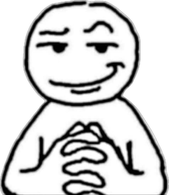 

In [39]:
df.keys()

Index(['ID', 'TYPE', 'PROGRAM', 'PHONE', 'DISTADD', 'DISTBORO', 'DISTZIP',
       'DAYS', 'borough', 'has_pantry_access', 'has_kitchen_access',
       'access_type', 'DAYS_clean', 'weekday_available', 'weekend_available'],
      dtype='object')

### I will investigate the addresses

In [40]:
df['DISTADD'].value_counts().index.tolist()

['108 EAST 51ST STREET',
 '296 NINTH AVENUE',
 '874 MYRTLE AVENUE',
 '2290 FIRST AVENUE',
 '5518 CHURCH AVENUE',
 '777 SCHENECTADY AVENUE',
 '520 50TH STREET',
 '360 SCHERMERHORN STREET',
 '200 FOURTH AVENUE',
 '2348 ADAM CLAYTON POWELL JR. BLVD',
 '110-25 GUY R. BREWER BLVD.',
 '800 MARCY AVENUE',
 '8 EAST 109TH STREET',
 '89-60 164TH STREET',
 '257 MACON STREET',
 '71 MALTA STREET',
 '138 PENNSYLVANIA AVE',
 '1256 DEAN STREET',
 '1014-18 GATES AVENUE',
 '795 LEXINGTON AVE',
 '1151 BUSHWICK AVENUE',
 '1745 1ST AVENUE',
 '1909 VYSE AVENUE',
 '1101 BOSTON ROAD',
 '3780 THIRD AVENUE',
 '603 PROSPECT AVENUE',
 '35-30 103RD STREET',
 "295 ST. ANN'S AVENUE",
 '100-10 ASTORIA BLVD (EAST ELMHURST)',
 '86-07 35TH AVENUE',
 '1372 CONEY ISLAND AVE',
 '105-47 64TH ROAD',
 '425 EAST 159TH STREET',
 '114 EAST 188TH STREET',
 '3154 FISH AVENUE',
 '15 BROAD STREET',
 '2114 MERMAID AVE',
 '90-23 161ST STREET',
 '2759 WEBSTER AVENUE',
 '120 EAST 32ND STREET',
 '1047 AMSTERDAM AVENUE',
 '241 WEST 72ND S

In [102]:
# let's validate DISTADD
df[df['DISTADD'].isna() | (df['DISTADD'].str.strip() == '')]

,ID,TYPE,PROGRAM,PHONE,DISTADD,DISTBORO,DISTZIP,DAYS,borough,has_pantry_access,has_kitchen_access,access_type,DAYS_clean,weekday_available,weekend_available


In [41]:
df['DISTADD'].str.contains(
    'TBD|VARIES|MULTIPLE|UNKNOWN|SEE',
    regex=True,
    na=False
).value_counts()


DISTADD
False    561
Name: count, dtype: int64

In [42]:
df['DISTADD'].str.contains(r'\d', regex=True).value_counts()


DISTADD
True    561
Name: count, dtype: int64

In [43]:
df['DISTADD'].value_counts().head(10)


DISTADD
108 EAST 51ST STREET                 3
296 NINTH AVENUE                     2
874 MYRTLE AVENUE                    2
2290 FIRST AVENUE                    2
5518 CHURCH AVENUE                   2
777 SCHENECTADY AVENUE               2
520 50TH STREET                      2
360 SCHERMERHORN STREET              2
200 FOURTH AVENUE                    2
2348 ADAM CLAYTON POWELL JR. BLVD    2
Name: count, dtype: int64

##### Documentation
EFAP site street addresses were validated for completeness and geocodability, with no missing or non-address entries identified prior to spatial processing.

In [ ]:
# build full address (geocoder-friendly)
# Create one standardized, geocoder-friendly address string and void passing fragmented fields to the APIi
df['full_address'] = (df['DISTADD'].astype(str).str.strip().str.upper()+ ', NEW YORK, NY ' + df['DISTZIP'].astype(str).str.strip())

#  Visually confirm addresses look real and consistent
df['full_address'].sample(10, random_state=42)


513    215-31 99TH AVENUE (QUEEN VILLAGE), NEW YORK, ...
342                  424 DEAN STREET, NEW YORK, NY 11217
177            881 EAST 167TH STREET, NEW YORK, NY 10459
86               1832 MADISON AVENUE, NEW YORK, NY 10035
333                 257 MACON STREET, NEW YORK, NY 11216
140               1905 MORRIS AVENUE, NEW YORK, NY 10453
321                    8635 21ST AVE, NEW YORK, NY 11214
531                 157-11 111TH AVE, NEW YORK, NY 11433
101             415 EAST 93RD STREET, NEW YORK, NY 10128
519             175-44 MAYFIELD ROAD, NEW YORK, NY 11432
Name: full_address, dtype: object

In [48]:
df[df["borough"].isna()][["DISTADD", "DISTBORO"]]


,DISTADD,DISTBORO
47,601 WEST 114TH STREET (BASEMENT OF BROADWAY PR...,NaN


##### comment
not the basement of broadway... let me fix that

In [49]:
df.loc[
    df['DISTADD'].str.contains('601 WEST 114TH STREET', na=False),
    'borough'
] = 'Manhattan'


In [50]:
df[df["borough"].isna()][["DISTADD", "DISTBORO"]]


,DISTADD,DISTBORO


In [52]:
df.keys()

Index(['ID', 'TYPE', 'PROGRAM', 'PHONE', 'DISTADD', 'DISTBORO', 'DISTZIP',
       'DAYS', 'borough', 'has_pantry_access', 'has_kitchen_access',
       'access_type', 'DAYS_clean', 'weekday_available', 'weekend_available',
       'full_address', 'houseNumber', 'street'],
      dtype='object')

In [53]:
def geocode_geoclient(house_number, street, borough):
    params = {
        "houseNumber": str(house_number),
        "street": street,
        "borough": borough
    }

    r = requests.get(BASE_URL, headers=HEADERS, params=params)

    if r.status_code != 200:
        return pd.Series([None, None, None])

    data = r.json()

    if "address" not in data:
        return pd.Series([None, None, None])

    a = data["address"]

    return pd.Series([
        a.get("nta"),        # nta_id
        a.get("latitude"),
        a.get("longitude")
    ])


In [54]:
df[["nta_id", "latitude", "longitude"]] = df.apply(
    lambda r: geocode_geoclient(
        r["houseNumber"],
        r["street"],
        r["borough"]
    ),
    axis=1
)


### Documentation for the 2 steps above
- This step geocodes each EFAP site address using the NYC Geoclient API. For every record, the function sends the house number, street name, and borough to Geoclient and attempts to retrieve the corresponding Neighborhood Tabulation Area (NTA) along with latitude and longitude coordinates. If the API request fails or does not return a valid address response, the function safely returns null values rather than dropping the record. The resulting NTA identifier and coordinates are then added as new columns to the dataset, preserving all original rows while enriching the data with geographic context needed for neighborhood-level analysis. 

In [ ]:
# debug check, not needed for pipeline 
test = geocode_geoclient(df.loc[0,"houseNumber"], df.loc[0,"street"], df.loc[0,"borough"])
print(type(test))
print(test)


<class 'pandas.core.series.Series'>
0         MN13
1    40.749416
2   -73.999188
dtype: object


In [ ]:
# quality check
df[["nta_id", "latitude", "longitude"]].isna().mean()


nta_id       0.299465
latitude     0.299465
longitude    0.299465
dtype: float64

In [ ]:
# NTA distribution check
df["nta_id"].value_counts().head()

nta_id
BK61    15
BK82    14
BK75    13
BK42    12
MN03    11
Name: count, dtype: int64

In [60]:
df[df["nta_id"].isna()][["DISTADD", "borough"]].head()


,DISTADD,borough
5,160 ALLEN STREET - SUITE #20,MANHATTAN
11,25-29 AVENUE D,MANHATTAN
17,346 WEST 20TH ST. NR. 9TH AVE,MANHATTAN
47,601 WEST 114TH STREET (BASEMENT OF BROADWAY PR...,Manhattan
54,(101) 429 WEST 127TH STREET,MANHATTAN


In [142]:
df.keys()

Index(['ID', 'TYPE', 'PROGRAM', 'PHONE', 'DISTADD', 'DISTBORO', 'DISTZIP',
       'DAYS', 'borough', 'has_pantry_access', 'has_kitchen_access',
       'access_type', 'DAYS_clean', 'weekday_available', 'weekend_available',
       'full_address', 'houseNumber', 'street', 'nta_id', 'latitude',
       'longitude'],
      dtype='object')

### DOCUMENTATION FOR GEOCODING PROCESS

For the EFAP dataset, the goal of this step was to assign each food assistance site to a Neighborhood Tabulation Area (NTA) and obtain geographic coordinates so the data could be analyzed at the neighborhood level. The raw EFAP data includes street address, borough, and ZIP code information, but it does not include latitude, longitude, or NTA identifiers. Because the project’s analysis is conducted at the neighborhood level, geocoding was required to translate site addresses into official NYC geographic units.

To do this, NYC Geoclient was used as the geocoding service. Geoclient was chosen over general-purpose geocoders because it is maintained by the City of New York and returns authoritative NYC-specific geography, including NTA codes. This ensures higher accuracy and consistency when mapping EFAP sites to neighborhoods. A Geoclient API key was created through the NYC API Portal and stored securely as an environment variable so that credentials were not exposed in the notebook or version control.

Before geocoding, address data from the EFAP dataset was prepared by separating street addresses into house number and street name components and standardizing borough values. These cleaned fields were required inputs for the Geoclient address endpoint. Once prepared, each address was sent to the Geoclient API using the house number, street, and borough as parameters.

For each successful response, a subset of geographic fields was extracted from the returned data. These included latitude and longitude for spatial reference, as well as the NTA identifier, which serves as the primary neighborhood key for analysis. While Geoclient also provides additional metadata such as NTA names and census identifiers, only the NTA code was retained at this stage. NTA names are joined later from a reference table to avoid redundancy and maintain clean relational structure.

Not all addresses successfully returned an NTA due to nonstandard address formats, basement descriptions, or ambiguous locations. These cases were expected and documented. Rather than dropping these rows from the dataset entirely, they were preserved in the raw EFAP data, and a geocoded analysis-ready subset was created containing only records with valid NTA identifiers and coordinates. This approach maintains data integrity while ensuring neighborhood-level analysis is performed only on reliable geographic assignments.

After geocoding, validation checks were performed to assess completeness and accuracy. Missing values for NTA, latitude, and longitude were quantified, and spot checks were conducted to confirm that returned NTAs aligned with known neighborhood locations. The resulting EFAP dataset now includes reliable neighborhood identifiers and geographic coordinates and is considered complete for downstream aggregation, schema creation, and integration with NTA-level prioritization data.

At this point, no further cleaning or enrichment is required for the EFAP dataset. It is ready to be used in the project’s data model and can be safely loaded during schema creation and analysis.

### Further Geocoding and NTA Assignment Documentation

For each EFAP site address, the NYC Geoclient API response was inspected and parsed. When a match was successful, the response returned a nested address object containing geographic metadata. From this object, latitude, longitude, and the neighborhood tabulation area identifier (nta, used as nta_id) were extracted. While additional neighborhood fields such as nta2020 were available in some responses, only the nta_id was retained for downstream analysis, as it serves as a stable neighborhood identifier and can be joined to reference tables to retrieve names or other attributes when needed.

Out of 561 total EFAP records, 393 addresses were successfully geocoded, meaning they returned valid latitude, longitude, and NTA identifiers. The remaining 168 records resulted in null values for these fields. These nulls were not treated as errors, but rather as expected outcomes due to real-world address quality issues. Common causes included non-standard address formatting (such as cross-street references or basement-level descriptions), missing or ambiguous house numbers, address ranges, or location descriptions that do not correspond to a single parcel. Because the Geoclient API is intentionally strict, no attempt was made to force or infer matches for these records.

All records, including those with missing geocodes, were preserved in the dataset to maintain transparency and avoid introducing bias through selective record removal. A missingness audit confirmed that approximately 29.9% of records lacked geocoded values, which is consistent with expectations for administrative and community-reported datasets. These records can either be excluded from neighborhood-level spatial analysis or revisited in future work with additional address cleaning if higher geographic coverage is required.

At the conclusion of this process, the EFAP dataset contained the geographic identifiers needed for neighborhood-level analysis and was considered ready for export as a clean CSV. The dataset is now compatible with downstream steps such as schema creation, database ingestion, and joins with NTA-level tabulation or demographic datasets.

In [62]:
print(df.shape)

(561, 21)


In [66]:
df[["nta_id", "latitude", "longitude"]].isna().sum()


nta_id       168
latitude     168
longitude    168
dtype: int64

In [64]:
df.reset_index(drop=True).shape


(561, 21)

In [143]:
# export to a clean csv
df.to_csv("efap_cleaned.csv", index=False)